### 集成学习

1. 采用同一基模型,在样本的不同子集上进行训练,从而得到对应的多个不同具体模型. 这类学习方法的
   代表有:boosting, bagging
2. 采用多种基模型,在同一样本上进行训练,将多个模型组合起来得到具体模型,比如voting、stacking

In [1]:
## 单一模型集成 -- Adaboost为例
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(LogisticRegression(), n_estimators=100)
clf.fit(X, y)
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [2]:
### 多模型集成 -- 以voting为例
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X, y = iris.data, iris.target
print(X)
clf1 = LogisticRegression(max_iter=500, random_state=1)
clf2 = RandomForestClassifier(random_state=1, n_estimators=50)
clf3 = GaussianNB()
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard'
)

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %.2f (+/- %.2f) [%s]" % (scores.mean(), scores.std(), label))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
### 集合算法
## https://developer.aliyun.com/article/1160229
## images/boosting.png
## 1.根据多个不同模型给出的预测结果,利用平均(回归)或者投票(分类)的方法,得到最终的预测结果.
## 2.根据不同训练子集训练出来的同一种类型的模型,将多个模型结合起来,得到最终的模型

## 正向激励
## 首先,为样本随机分配权重,构建一棵带有权重的决策树,由该决策树提供预测输出时,通过加权或投票的方式产生预测值.将训练样本代入模型,预测其输出,对那些预测值和实际值不同的样本,提高其权重,由此形成第二棵决策树.以此类推,构建出不同权重的若干棵决策树.

## 正向激励算法：boosting
## 正向激励算法是采取赋予权重的方法进行。

## 在具有m个数据的数据集中，将每一个数据赋予一个对应的权重，再将带权重的全部数据进行训练模型，然后取出那些预测结果有误的数据集，重新分配对应的权重，再进行训练，重复B次，训练出B个模模型

## 自助聚合算法：Bagging
# 自助聚合算法大名叫：Bootstrap Aggregating
# 它采取有放回方式的取样：
# 一个拥有m个数据的数据集，随机抽取一个数据放入一个新的数据集k中，然后再将这个抽取的数据放回m数据集中，再随机抽取一个数据再放入k中，就这样依次循环n次，得到n个数据的数据集k
#【注意】：在该数据集中，很有可能存在重复的数据，因为是有放回的抽样。
#【优点】：它可以降低数据集的噪声敏感
#【缺点】：会增加计算量

# 随机森林
# 随机森林是在Bagging的基础上进行的一个进化。它保存在RandomForestClassifier 和 RandomForestRegressor 中。

# 训练的时候要关注俩个特殊的数据：
# t：构建决策树的个数
# f：单科决策树的特征数

#【算法思想】：
# 1、放回抽取：首先对单颗数的构建，也是采用Bagging的思想，在m个数据中选取含有n个数据的数据集
# 2、不放回抽取：取出f个特征数据
# 3、将1和2的操作汇总，形成一颗决策树，再将这一颗决策树的思路循环t次，就得到了t颗决策树。

#【为何称为随机】：
# 因为如果不是随机取样的话，会导致耦合度过高，数据与数据之间有强关联的情况出现，导致一种倾向性的出现，不利于我们进行后续的模型训练

In [1]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import sklearn.metrics as metrics

np.random.seed(42)
X = np.array([i for i in range(100)]).reshape(-1, 1)
y = np.array(np.random.choice([1, -1], size=100))
print(X.shape, y.shape)

dt = DecisionTreeClassifier()
abc = AdaBoostClassifier(dt, n_estimators=20, learning_rate=0.1, random_state=42)

abc.fit(X, y)

y_pred = abc.predict(X)

print(metrics.mean_absolute_error(y, y_pred))
print(metrics.r2_score(y, y_pred))
print(metrics.accuracy_score(y, y_pred))

(100, 1) (100,)
0.0
1.0
1.0


In [2]:
## 获取波士顿房价数据
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### 加载boston数据
 # Variables in order:
 # CRIM     per capita crime rate by town
 # ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 # INDUS    proportion of non-retail business acres per town
 # CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 # NOX      nitric oxides concentration (parts per 10 million)
 # RM       average number of rooms per dwelling
 # AGE      proportion of owner-occupied units built prior to 1940
 # DIS      weighted distances to five Boston employment centres
 # RAD      index of accessibility to radial highways
 # TAX      full-value property-tax rate per $10,000
 # PTRATIO  pupil-teacher ratio by town
 # B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 # LSTAT    % lower status of the population
 # MEDV     Median value of owner-occupied homes in $1000's -- 这个不要
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
## 数据问题,数据是用文本存储的
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
boston = {
    'header': np.array(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']),
    'data' : data,
    'target' : target,
}
train_x, test_x, train_y, test_y = train_test_split(boston['data'], boston['target'], random_state=42, test_size=0.2, shuffle=True)

In [3]:
raw_df.values[1::2, :2]

array([[396.9 ,   4.98],
       [396.9 ,   9.14],
       [392.83,   4.03],
       ...,
       [396.9 ,   5.64],
       [393.45,   6.48],
       [396.9 ,   7.88]])

In [4]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((404, 13), (102, 13), (404,), (102,))

[0.03160301 0.00168862 0.01339528 0.00169268 0.03086772 0.20427187
 0.021995   0.09762838 0.00549042 0.02560475 0.02892884 0.02197827
 0.51485516]
最重要的特征: LSTAT
训练: 0.997905677255533
测试: 0.8806298292409684


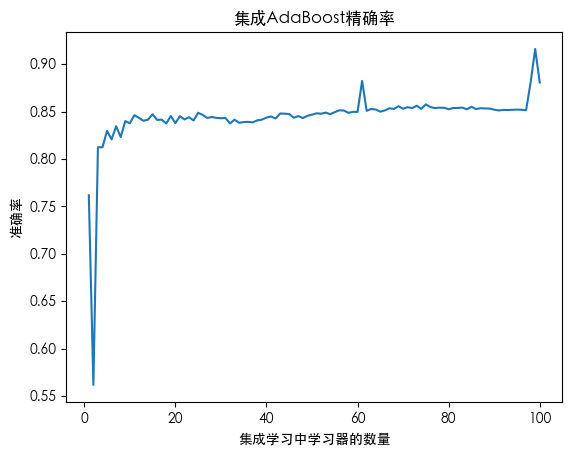

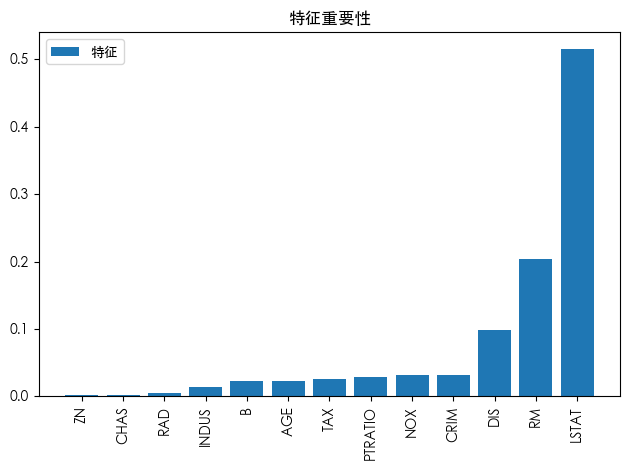

In [5]:
import matplotlib.pyplot as plt
import sklearn.ensemble as ensemble
import sklearn.tree as tree
plt.rcParams['font.sans-serif'] = ['STHeiti']
plt.rcParams['axes.unicode_minus'] = False

staged = 100
dtModel = tree.DecisionTreeRegressor(random_state=42, max_depth=10)
model = ensemble.AdaBoostRegressor(estimator=dtModel, n_estimators=staged, random_state=42)
model.fit(train_x, train_y)

# y_pred = model.predict(test_x)
### 决策树模型训练过程的副产品, 根据每个特征划分字表前后的信息熵减少量就标志了该特征的重要程度
print(model.feature_importances_)
print('最重要的特征:', boston['header'][model.feature_importances_.argmax()])

print('训练:', model.score(train_x, train_y))
print('测试:', model.score(test_x, test_y))

plt.title("集成AdaBoost精确率")
plt.ylabel("准确率")
plt.xlabel("集成学习中学习器的数量")
plt.plot(range(1, staged+1),[accuracy for accuracy in  model.staged_score(test_x,test_y)])
plt.show()


fig = plt.figure()
plt.title('特征重要性')
## 对数组排序,返回排序的下标
sort_ind = model.feature_importances_.argsort()
plt.bar(range(len(model.feature_importances_)), model.feature_importances_[sort_ind], align='center', label="特征")
plt.xticks(range(len(model.feature_importances_)), boston['header'][sort_ind], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
### 自助聚合()
## 有回放随机抽取部分样本作为数据集,构建决策树, 抽取多少个数据集,就有多少个决策树
## 缺弱某些强势样本 或者 特殊样本, 提高泛化性

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. 加载波士顿房价数据
# 通过 fetch_openml 获取 Boston 数据集（注意：该数据集已被弃用，仅用于示例）
boston = fetch_openml(name="boston", version=1, as_frame=True)
print(boston.feature_names)
X = boston.data
# 将目标变量转换为浮点数类型
y = boston.target.astype(np.float32)

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 构建 BaggingRegressor 模型
# 使用 DecisionTreeRegressor 作为基础回归器
bagging_reg = BaggingRegressor(
    DecisionTreeRegressor(random_state=42),
    n_estimators=50,
    random_state=42
)
bagging_reg.fit(X_train, y_train)

# 4. 对测试集进行预测
y_pred = bagging_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Test R² Score:", r2)

# 5. 绘图：预测值与真实值散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k', label="预测值")
# 绘制 45° 参考线（理想情况下预测值应等于真实值）
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="理想线")
plt.xlabel("真实房价")
plt.ylabel("预测房价")
plt.title("BaggingRegressor 波士顿房价预测")
plt.legend()
plt.grid(True)
plt.show()

单个决策树 - MSE: 0.020162190486791815 R²: 0.9598636295681788
BaggingRegressor - MSE: 0.011597269381562598 R²: 0.9769136046898801
(20,) (20,)


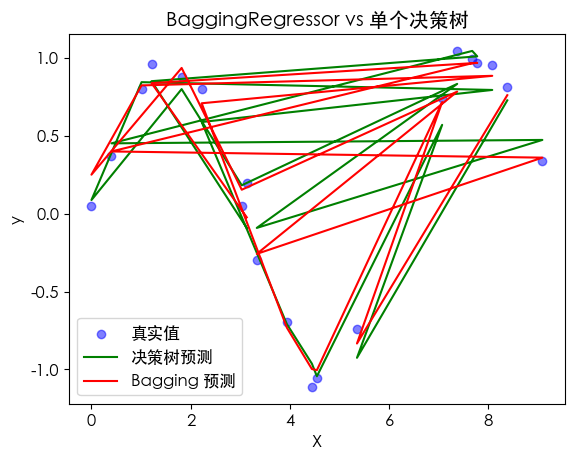

In [35]:
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 生成模拟回归数据
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.1, X.shape)  # 正弦函数 + 噪声

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 单个决策树
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# BaggingRegressor
bagging = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=10,           # 10 个基学习器
    max_samples=0.8,           # 每个子数据集用 80% 的样本
    max_features=1.0,          # 使用所有特征
    bootstrap=True,            # 有放回采样
    random_state=42
)
bagging.fit(X_train, y_train.ravel())
y_pred_bagging = bagging.predict(X_test)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

# 输出结果
print("单个决策树 - MSE:", mse_dt, "R²:", r2_dt)
print("BaggingRegressor - MSE:", mse_bagging, "R²:", r2_bagging)

# 可视化
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12
plt.rcParams['font.sans-serif'] = ['STHeiti']
plt.rcParams['axes.unicode_minus'] = False
print(X_test.ravel().shape, y_pred_bagging.ravel().shape)
plt.scatter(X_test.ravel(), y_test.ravel(), color='blue', label='真实值', alpha=0.5)
plt.plot(X_test, y_pred_dt, color='green', label='决策树预测')
plt.plot(X_test.ravel(), y_pred_bagging.ravel(), color='red', label='Bagging 预测')
plt.xlabel('X')
plt.ylabel('y')
plt.title('BaggingRegressor vs 单个决策树')
plt.legend()
plt.show()

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Test R² Score: 0.8950447458052778


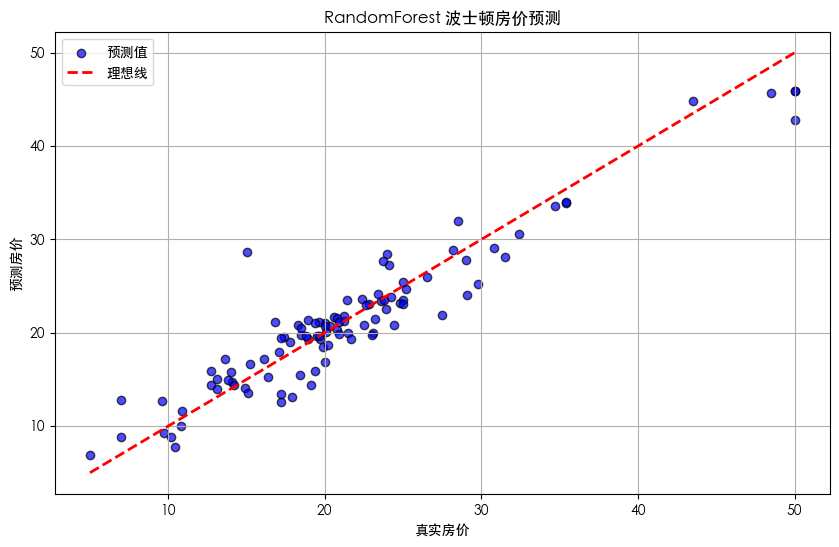

In [7]:
### 随机森林
## 在自助聚合的基础上,随机特征列,自由组合样本和特征,缺弱强势特征, 提高泛化性
## 随机森林的基础学习器是固定的,就是决策树!
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. 加载波士顿房价数据
# 通过 fetch_openml 获取 Boston 数据集（注意：该数据集已被弃用，仅用于示例）
boston = fetch_openml(name="boston", version=1, as_frame=True)
print(boston.feature_names)
X = boston.data
# 将目标变量转换为浮点数类型
y = boston.target.astype(np.float32)

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 构建 RandomForestRegressor 模型
model = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)

# 4. 对测试集进行预测
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Test R² Score:", r2)

# 5. 绘图：预测值与真实值散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k', label="预测值")
# 绘制 45° 参考线（理想情况下预测值应等于真实值）
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="理想线")
plt.xlabel("真实房价")
plt.ylabel("预测房价")
plt.title("RandomForest 波士顿房价预测")
plt.legend()
plt.grid(True)
plt.show()


(731, 11) (731,)
(657, 11) (74, 11) (657,) (74,)
Test R² Score: 0.8937707003322881
[ 3  5  4  6  2 10  9  0  8  1  7] ['holiday' 'workingday' 'weekday' 'weathersit' 'mnth' 'windspeed' 'hum'
 'season' 'atemp' 'yr' 'temp']


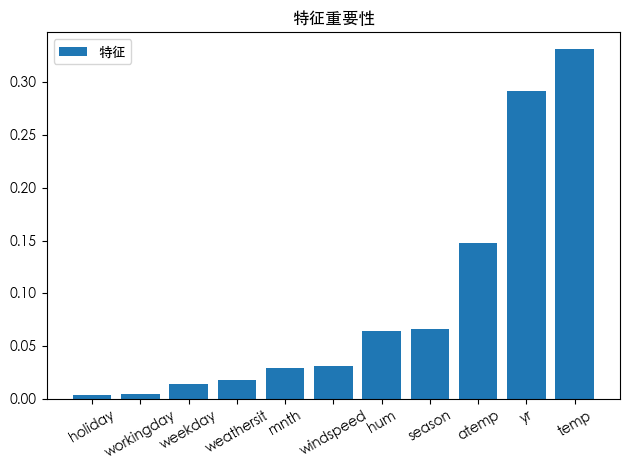

In [9]:
### 用随机森林预测共享单车的释放

import sklearn.model_selection as sms
import sklearn.utils as su
import numpy as np
import sklearn.ensemble as sk
import sklearn.metrics as sm

data = np.loadtxt("./bike_day.csv", delimiter=",", unpack=False, dtype='U20')
day_headers = data[0, 2:13]
x = np.array(data[1:, 2:13], dtype='float32')
y = np.array(data[1:, -1], dtype='float32')

# x, y = sms.train_test_split(x, y, test_size=0.2, random_state=7, shuffle=True)
x, y = su.shuffle(x, y, random_state=7)
print(x.shape, y.shape)
train_size = int(len(x) * 0.9)
train_x, test_x, train_y, test_y = x[:train_size], x[train_size:], y[:train_size], y[train_size:]
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)
model = sk.RandomForestRegressor(
    n_estimators=1000,
    max_depth=10,
    random_state=7,
    min_samples_split=2, ## 一个节点进行分裂所需的最小样本数
)

model.fit(train_x, train_y)

y_pred = model.predict(test_x)
r2 = sm.r2_score(test_y, y_pred)
print("Test R² Score:", r2)
sort_idn = model.feature_importances_.argsort()
print(sort_idn, day_headers[sort_idn])

plt.figure()
plt.title('特征重要性')
xs = range(len(model.feature_importances_))
plt.bar(xs, model.feature_importances_[sort_idn], align='center', label="特征")
plt.xticks(xs, day_headers[sort_idn], rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

(17379, 12) (17379,)
(15641, 12) (1738, 12) (15641,) (1738,)
Test R² Score: 0.918321175270564
[ 4 11  5  2  9 10  7  0  6  1  8  3] ['holiday' 'windspeed' 'weekday' 'mnth' 'atemp' 'hum' 'weathersit'
 'season' 'workingday' 'yr' 'temp' 'hr']


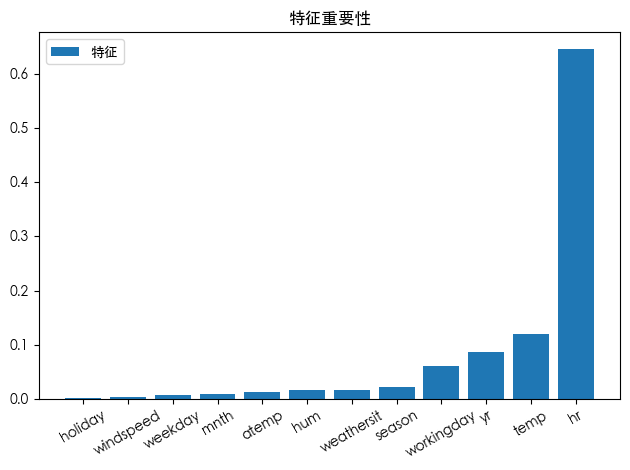

In [10]:
### 用随机森林预测共享单车的释放--小时

import sklearn.model_selection as sms
import sklearn.utils as su
import numpy as np
import sklearn.ensemble as sk
import sklearn.metrics as sm

data = np.loadtxt("./bike_hour.csv", delimiter=",", unpack=False, dtype='U20')
hour_headers = data[0, 2:14]
x = np.array(data[1:, 2:14], dtype='float32')
y = np.array(data[1:, -1], dtype='float32')

# x, y = sms.train_test_split(x, y, test_size=0.2, random_state=7, shuffle=True)
x, y = su.shuffle(x, y, random_state=7)
print(x.shape, y.shape)
train_size = int(len(x) * 0.9)
train_x, test_x, train_y, test_y = x[:train_size], x[train_size:], y[:train_size], y[train_size:]
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)
model = sk.RandomForestRegressor(
    n_estimators=1000,
    max_depth=10,
    random_state=7,
    min_samples_split=2, ## 一个节点进行分裂所需的最小样本数
)

model.fit(train_x, train_y)

y_pred = model.predict(test_x)
r2 = sm.r2_score(test_y, y_pred)
print("Test R² Score:", r2)
sort_idn = model.feature_importances_.argsort()
print(sort_idn, hour_headers[sort_idn])

plt.figure()
plt.title('特征重要性')
xs = range(len(model.feature_importances_))
plt.bar(xs, model.feature_importances_[sort_idn], align='center', label="特征")
plt.xticks(xs, hour_headers[sort_idn], rotation=30)
plt.legend()
plt.tight_layout()
plt.show()